# Example 1

In [1]:
import numpy as np
import scipy as sc

#Define the coefficient matrix A

A=np.array([[1,3,5],[2,5,1],[2,3,8]])
print(A)


[[1 3 5]
 [2 5 1]
 [2 3 8]]


In [2]:
#Define the right hand side vector b
b = np.array([[10], [8], [3]])
print(b)

[[10]
 [ 8]
 [ 3]]


In [3]:
# Calculate the inverse of A and multiply by b to find the solution vector
C = sc.linalg.inv(A).dot(b)
print(C)

[[-9.28]
 [ 5.16]
 [ 0.76]]


In [4]:
# Alternatively, use the solve function to find the solution vector directly
D = sc.linalg.solve(A, b)  #linalg means linear algebra
print(D)


[[-9.28]
 [ 5.16]
 [ 0.76]]


# Example 2

In [5]:
import numpy as np
from scipy.linalg import solve

# Coefficients matrix
A = np.array([[3, 2],
              [1, 2]])

# Constants vector
b = np.array([1, 0])

# Using the solve function to find the solution to the system of equations
solution = solve(A, b)

print(solution)


[ 0.5  -0.25]


In [6]:
#Alternative, by using the inverse of A and multiply by b to find the solution vector
solution = sc.linalg.inv(A).dot(b)

print(solution)

[ 0.5  -0.25]


# SOLVING ORDINARY DIFFERENTIAL EQUATIONS(ODE)

In [7]:
# Python program to implement Runge Kutta method
# A sample differential equation "dy / dx = (x - y)/2"
def dydx(x, y):
    return ((x - y)/2)

# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta(x0, y0, x, h):
    # Count number of iterations using step size or
    # step height
    n = int((x - x0)/h)
    # Iterate for number of iterations
    y = y0
    for i in range(1, n + 1):
        # Apply Runge Kutta Formulas to find next value of y
        k1 = dydx(x0, y)
        k2 = dydx(x0 + 0.5 * h, y + 0.5 *h * k1)
        k3 = dydx(x0 + 0.5 * h, y + 0.5 *h * k2)
        k4 = dydx(x0 + h, y + h*k3)
        
        # Update next value of y
        y = y + (1.0 / 6.0)*h *(k1 + 2 * k2 + 2 * k3 + k4)
        
        # Update next value of x
        x0 = x0 + h
        print (n)
        print (i)
    return y

# Driver method
x0 = 0
y = 1
x = 5
h = 0.2
print('The value of y at x is:', rungeKutta(x0, y, x, h))


25
1
25
2
25
3
25
4
25
5
25
6
25
7
25
8
25
9
25
10
25
11
25
12
25
13
25
14
25
15
25
16
25
17
25
18
25
19
25
20
25
21
25
22
25
23
25
24
25
25
The value of y at x is: 3.2462555535430524


# Pressure Profile In A Vessel

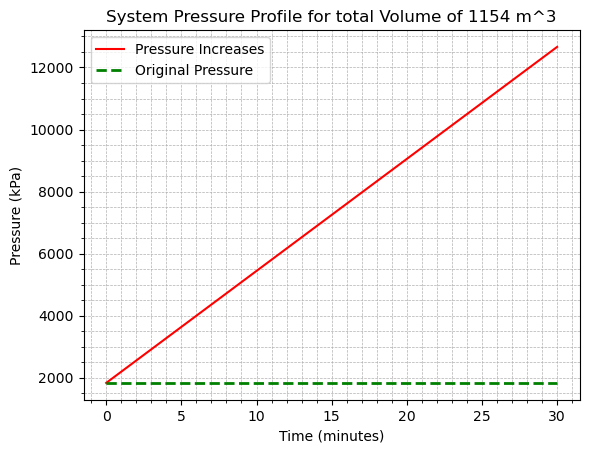

In [8]:
# Importing necessary libraries
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# parameter values for original SEIR
V = 1154 # m3
R = 8.314 # R[J/(mol*K)]
T = 120 # °C

mass_in = 473220 # kg/hr
MW_in = 56.6
mass_out = 28742 # kg/hr
MW_out = 40.4

# calculation, time in minutes
Tk = T + 273.15 # Convert to Kelvin
mol_in = mass_in/MW_in/60 # kmol/min
mol_out = mass_out/MW_out/60 # kmol/min

# initial condition
P0 = 1830 # kPa


# differential equation using ideal gas
def dPdt(P, t):
    # the differential equations
    dpdt = (mol_in - mol_out)/(V/(R*Tk))
    
    return dpdt


# create the x axis for the integration
# time to response is 20 minutes
start = 0
end = 30
t = np.linspace(start, end, end) #linspace find the point inbetween interval 0 to 30 to plot the graph

Pinitial = np.linspace(P0, P0, end)

# integration of the differential equation
P = sc.integrate.odeint(dPdt, P0, t)


# Plotting the results
plt.figure()
plt.plot(t, P, 'r', label='Pressure Increases')
plt.plot(t, Pinitial, 'g--', label='Original Pressure', linewidth=2)
plt.title(f'System Pressure Profile for total Volume of {V} m^3')
plt.xlabel('Time (minutes)')
plt.ylabel('Pressure (kPa)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.legend()
plt.show()
